# Análise de dados do Airbnb em Nova Iorque em 2019

## Introdução
A análise de dados na área de aluguéis de imóveis, como em várias outras áreas, é crucial para a tomada de decisões das empresas e empreendedores. Dessa forma, este notebook realiza uma análise exploratória e diagnóstica detalhada dos dados do Airbnb de Nova Iorque em 2019, com o objetivo de identificar padrões de comportamento dos usuários e obter insights significativos para iniciar um empreendimento na região.

## Dados
Os dados foram retirados do site Kaggle. Toda informação sobre o dataset, assim como seu download, estão no link abaixo.
https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data

Em resumo, o dataset é separado em 15 colunas que representam:

'id' = Número de idenfificação único do anúncio airbnb

'name' = Nome do host

'host_id' = Número de identificaçãp único do host 

'host_name' = Nome do host

'neighbourhood_group' = Destritos de NY ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'] chamrei de macroregiões
 'neighbourhood' = Bairros de NY [Mais de 200] chamarei de microregiões
 
 'latitude' e 'longitude'
 
 'room_type' = Tipo do quarto ['Private room' 'Entire home/apt' 'Shared room']
 
 'price' = Preço por noite
 
 'minimum_night' = Noites mínimas para alugar 
 
 'number_of_review = número de reviews por airbnb    
 
 'last_review' = último review                                             
 
 'reviews_per_mon' = número de reviews por mês
 
 'calculated_host_listings_cout' = Número de airbnbs cadastrador por anfitrião   
 
 'availability_365' = Número de dias disponíveis do ano para alugar

## Perguntas
Iremos imaginar um cliente que pretende criar um empreendimento comprando e alugando apartamentos, casas e quartos. Sendo assim, iremos destrinchar o dataset para responder algumas perguntas do cliente:


##### - Quais as regiões com mais airbnb's cadastrados
##### - Qual a média de preço da macroregião e microregião? e por tipo? 
##### - Número alto de reviews tem influência no maior número de aluguéis por ano? se sim, qual locais com maior número de reviews?
##### - Vizualização do comportamento dos tipos de airbnb's no mapa de NY
##### - Vizualização do posicionamento dos airbnb's nas regiões de NY
##### - Quais macro regiões mais ocupadas anualmente? e micro?
##### - Quais palavras mais repetidas nos títulos?
##### - Qual a média do número mínimo de noites? Macro e Micro regiões
##### - O número mínimo de noites tem relação com o preço do aluguel?
##### - Quais os tipos de airbnb's mais alugados no geral e por região?

## Bibliotecas e Carregamento dos DataSets

Fazendo importação das bibliotecas numpy, pandas e matplotlib para auxiliar na análise dos dados e subindo o dataset .csv 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('e/AB_NYC_2019.csv')

## Exploração Inicial dos Dados

In [5]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


Por meio dessas informações conseguimos observar como estão organizados os Datasets e tomar melhores decisões de como explorá-lo

##  Limpeza dos Dados

In [7]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Não precisamos descartar os valores nulos de host_name e name pois conseguimos utilizar suas linhas completas sem ambas variáveis.
Os valores nulos de last_review e reviews_per_mouth indicam apartamentos que ainda não foram avaliados por usuários, dessa forma, não deve ser descartado.

In [8]:
#preenchendo valores nulos
df['name'] = df['name'].fillna('Sem Nome')
df['host_name'] = df['host_name'].fillna('Desconhecido')
df['reviews_per_month'] = df['reviews_per_month'].fillna(0) 
#tranformando objetct em data
df['last_review'] = pd.to_datetime(df['last_review'])
#Salvando novo csv com os dados limpos
df.to_csv('dados_limpos.csv', index=False)

## Análise Exploratória dos Dados (Respondendo as perguntas do cliente)

### Quais as macro e micro regiões com mais airbnb's cadastrados

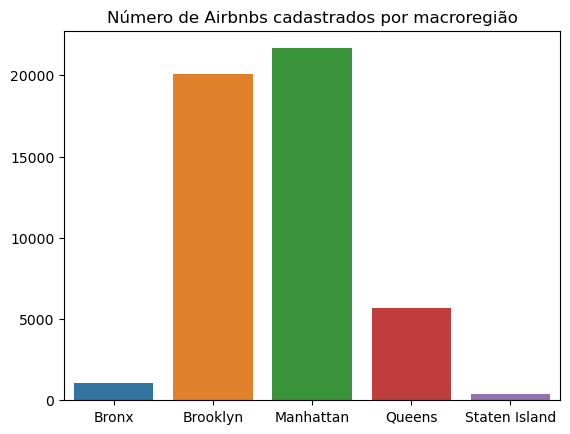

In [9]:
macro_regiao_count = df.groupby('neighbourhood_group')['id'].nunique().reset_index(name='count')
sns.barplot(x='neighbourhood_group', y='count', data=macro_regiao_count)
plt.xlabel('')
plt.ylabel('')
plt.title('Número de Airbnbs cadastrados por macroregião')
plt.show()

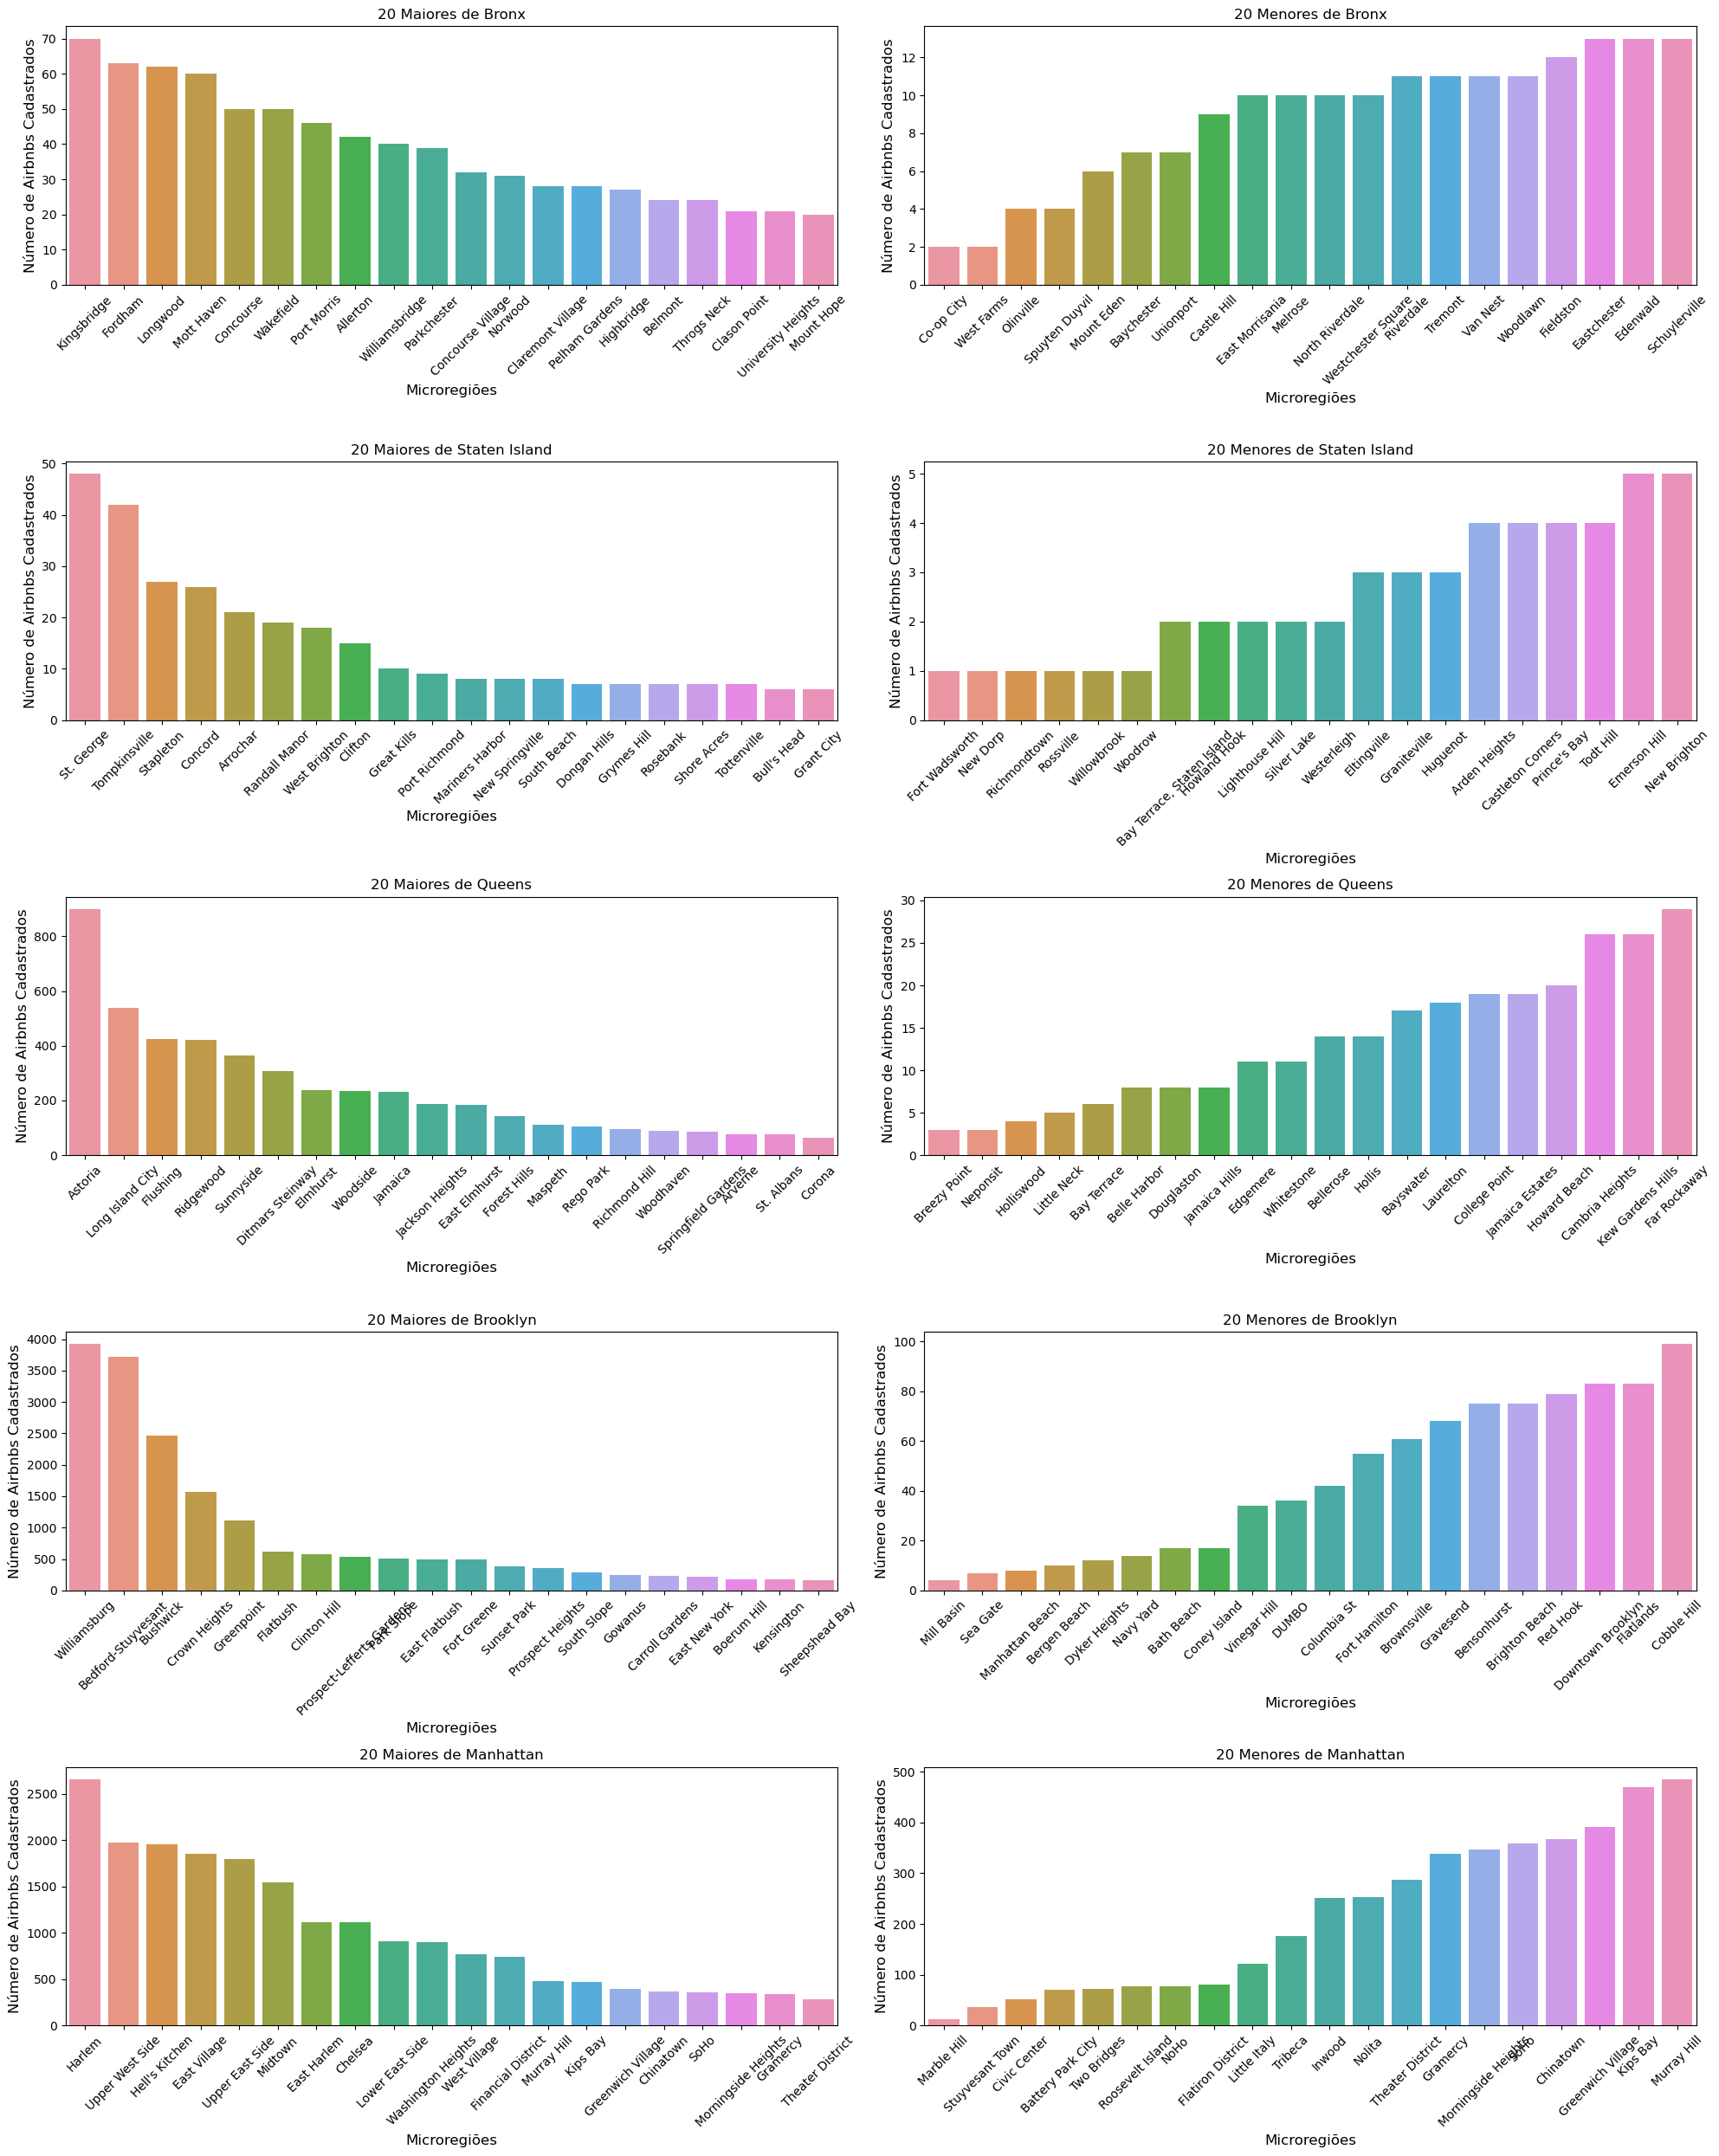

In [10]:
# Calculando a contagem de IDs únicos 
micro_regiao_count = df.groupby(['neighbourhood', 'neighbourhood_group'])['id'].nunique().reset_index(name='count')

# Função para pegar os maiores e menores 20 valores
def get_top_bottom_n(data, group_col, value_col, n=20):
    top_n = data.groupby(group_col).apply(lambda x: x.nlargest(n, value_col)).reset_index(drop=True)
    bottom_n = data.groupby(group_col).apply(lambda x: x.nsmallest(n, value_col)).reset_index(drop=True)
    return top_n, bottom_n

# Aplicando a função ao DataFrame
top_20, bottom_20 = get_top_bottom_n(micro_regiao_count, 'neighbourhood_group', 'count')

# Listando as microregiões únicas
neigh_groups = micro_regiao_count['neighbourhood_group'].unique()

# Definindo o tamanho da figura
fig, axes = plt.subplots(len(neigh_groups), 2, figsize=(20, 5 * len(neigh_groups)))

# Loop para criar gráficos separados por macroregião
for i, group in enumerate(neigh_groups):
    # Filtrando os dados para o grupo atual
    top_data = top_20[top_20['neighbourhood_group'] == group]
    bottom_data = bottom_20[bottom_20['neighbourhood_group'] == group]
    
    # Gráfico dos 20 maiores
    sns.barplot(x='neighbourhood', y='count', data=top_data, ax=axes[i, 0])
    axes[i, 0].set_title(f"20 Maiores de {group}")
    axes[i, 0].set_xlabel('Microregiões', fontsize=12)
    axes[i, 0].set_ylabel('Número de Airbnbs Cadastrados', fontsize=12)
    axes[i, 0].tick_params(axis='x', rotation=45)
    
    # Gráfico dos 20 menores
    sns.barplot(x='neighbourhood', y='count', data=bottom_data, ax=axes[i, 1])
    axes[i, 1].set_title(f"20 Menores de {group}")
    axes[i, 1].set_xlabel('Microregiões', fontsize=12)
    axes[i, 1].set_ylabel('Número de Airbnbs Cadastrados', fontsize=12)
    axes[i, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Qual a média de preço da macroregião e microregião? e por tipo?

Entende-se que a média é afetada diretamente por outliers. Dessa forma, para macroregiões , calculei também a mediana para ter como parâmetro além da média, tendo em vista que a mediana recebe menos influência de outliers. Para microregiões, calculei apenas a mediana devido ao grande número de regiões o que poderia dificultar a vizualização.

#### Média / Mediana por macroregião

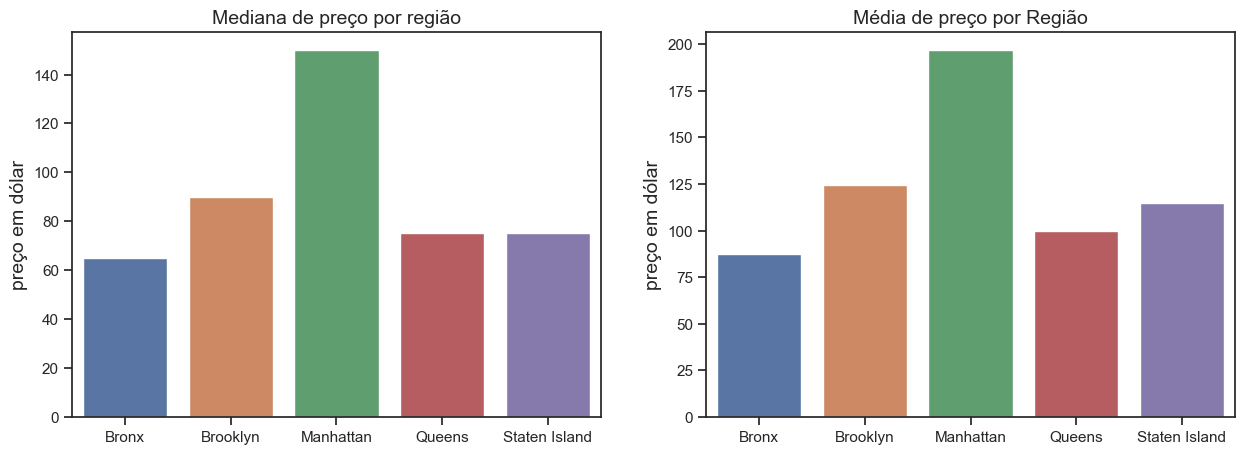

In [78]:
regiao_median_price = df.groupby('neighbourhood_group')['price'].median().reset_index()
regiao_mean_price = df.groupby('neighbourhood_group')['price'].mean().reset_index()
fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.barplot(x='neighbourhood_group', y='price', data=regiao_median_price, ax=axes[0])
sns.barplot(x='neighbourhood_group', y='price', data=regiao_mean_price, ax=axes[1])
axes[0].set_title('Mediana de preço por região', fontsize=14)
axes[1].set_title('Média de preço por Região', fontsize=14)
axes[0].set_xlabel('', fontsize=14)
axes[1].set_xlabel('', fontsize=14)
axes[0].set_ylabel('preço em dólar', fontsize=14)
axes[1].set_ylabel('preço em dólar', fontsize=14);

### Mediana de preço por microregião

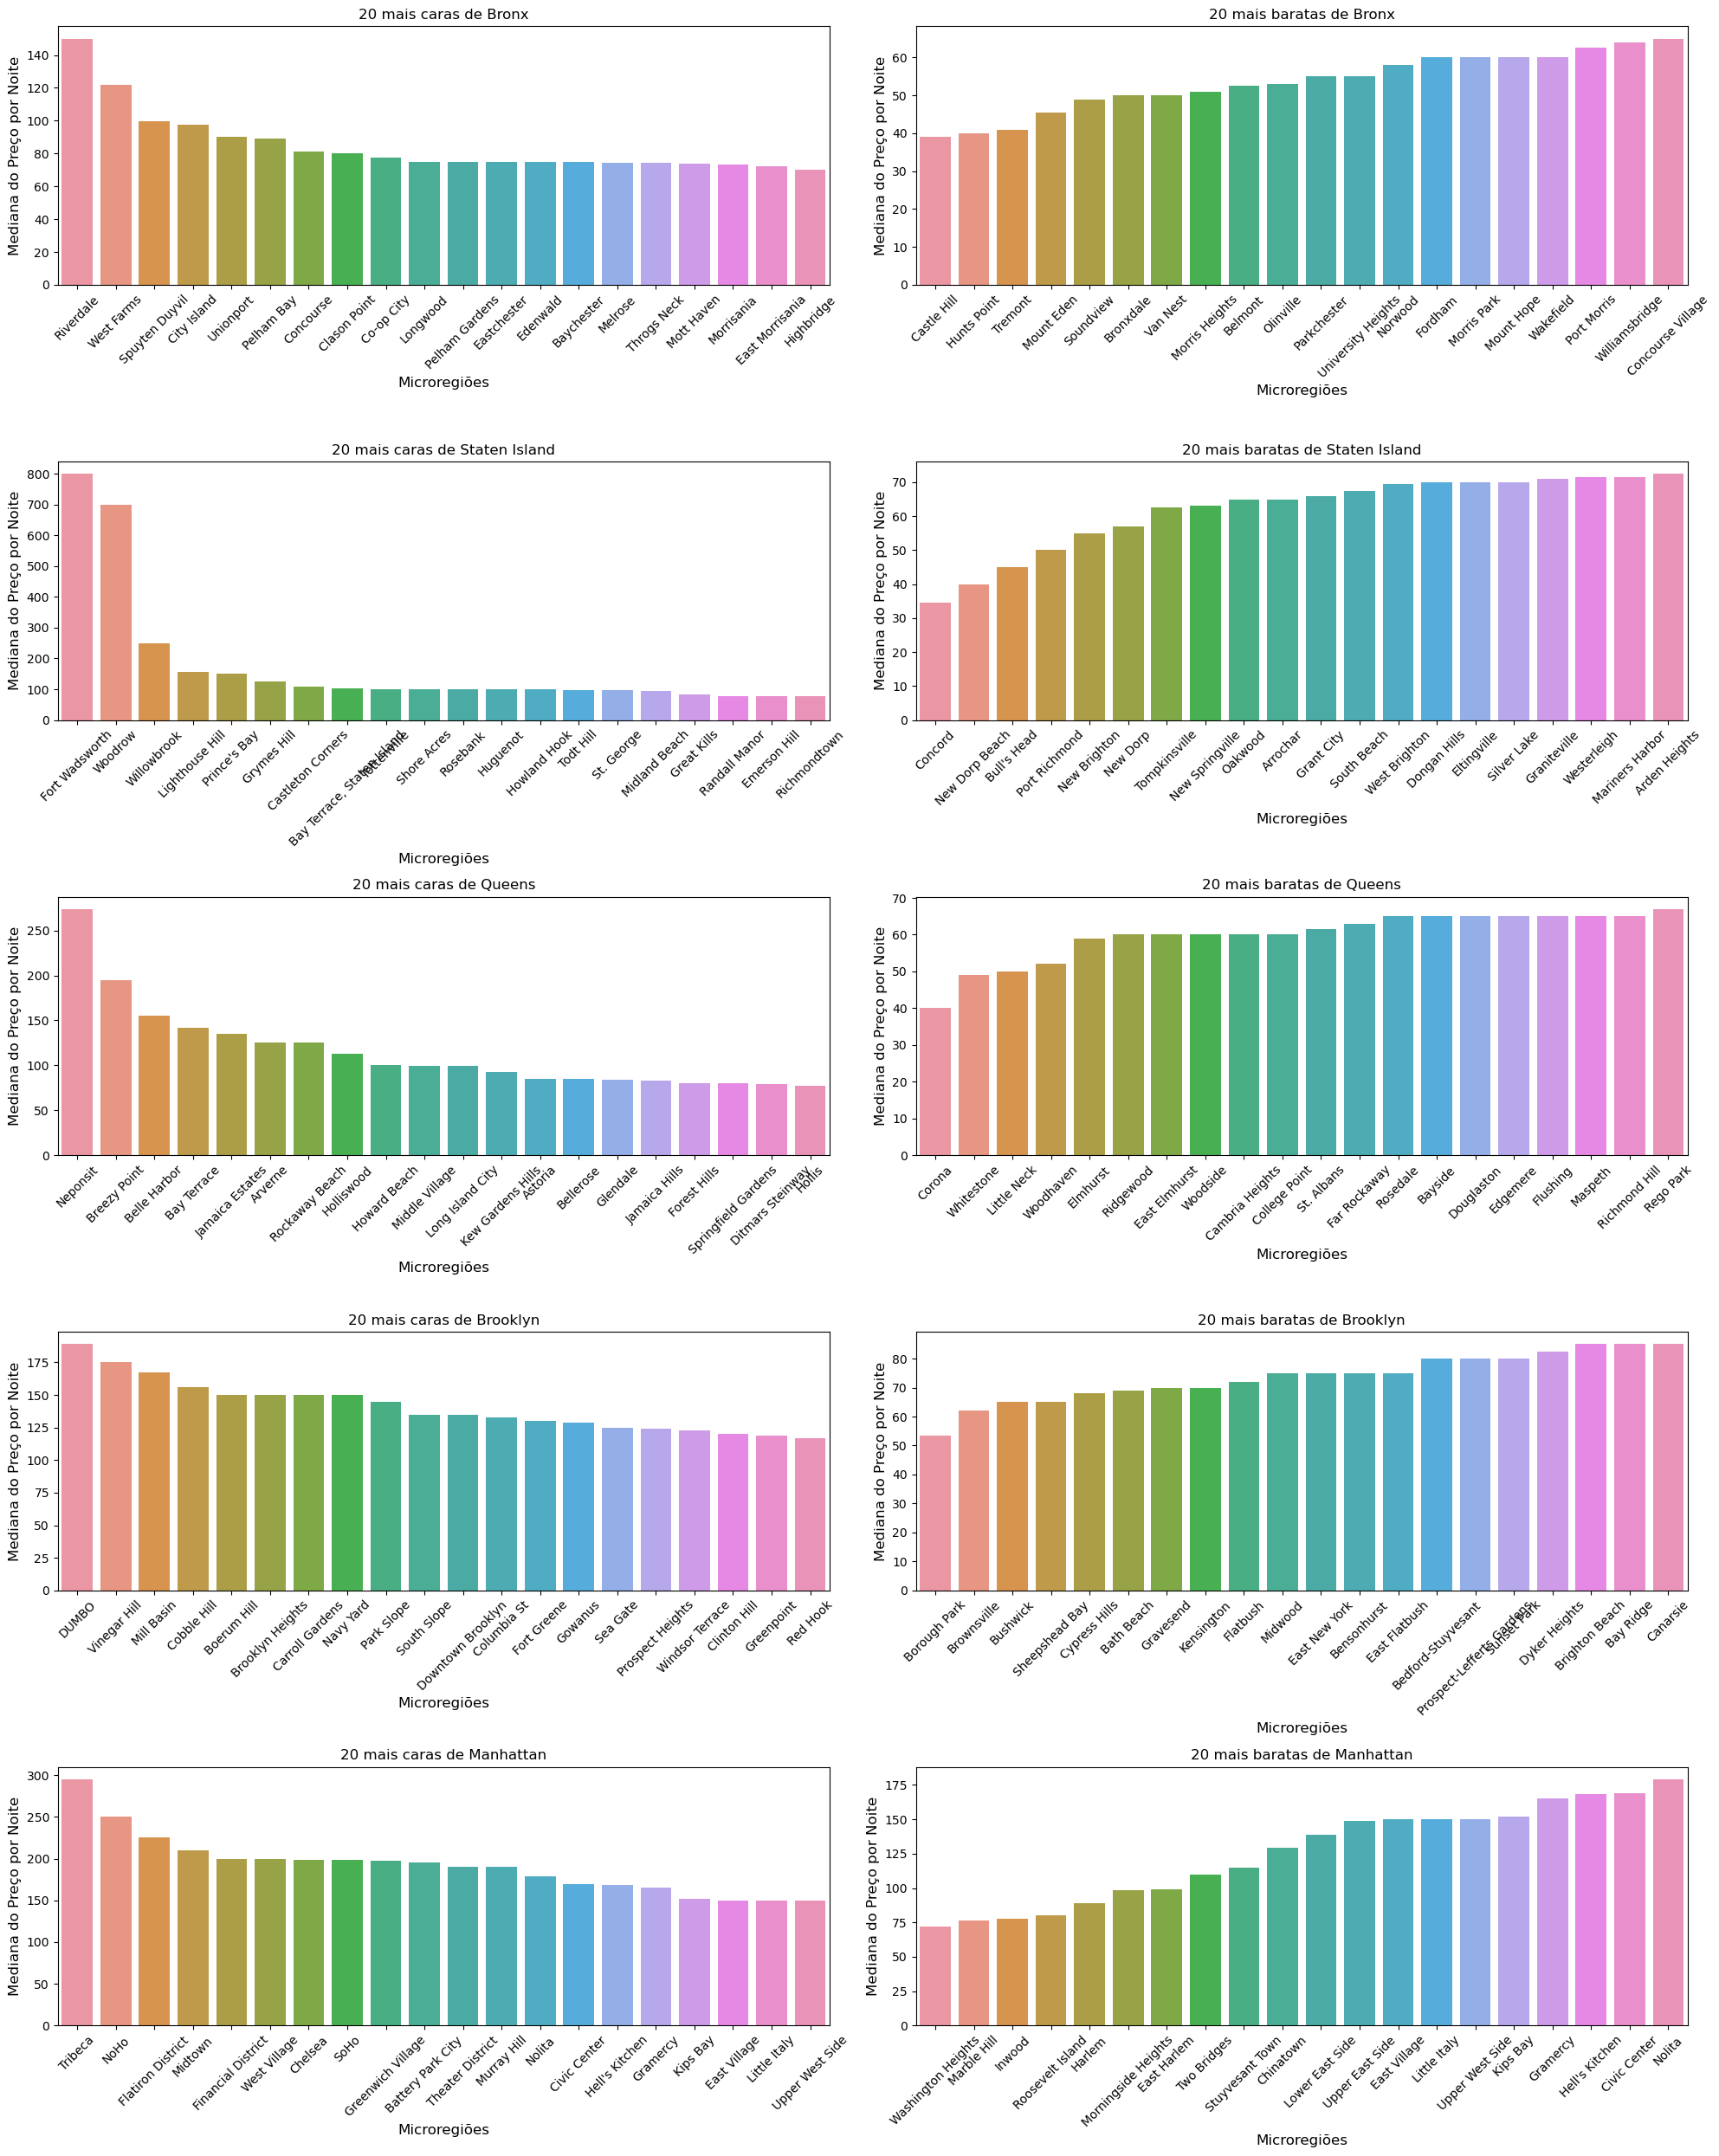

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculando a mediana dos preços 
micro_regiao_avg_price = df.groupby(['neighbourhood', 'neighbourhood_group'])['price'].median().reset_index(name='avg_price')

# Função para pegar os 20 maiores e menores
def get_top_bottom_n(data, group_col, value_col, n=20):
    top_n = data.groupby(group_col).apply(lambda x: x.nlargest(n, value_col)).reset_index(drop=True)
    bottom_n = data.groupby(group_col).apply(lambda x: x.nsmallest(n, value_col)).reset_index(drop=True)
    return top_n, bottom_n

# Aplicando a função ao DataFrame
top_20, bottom_20 = get_top_bottom_n(micro_regiao_avg_price, 'neighbourhood_group', 'avg_price')

# Listando as microregião únicas
neigh_groups = micro_regiao_avg_price['neighbourhood_group'].unique()

# Definindo o tamanho da figura
fig, axes = plt.subplots(len(neigh_groups), 2, figsize=(20, 5 * len(neigh_groups)))

# Loop para criar gráficos separados por microregiões
for i, group in enumerate(neigh_groups):
    # Filtrando os dados para o grupo atual
    top_data = top_20[top_20['neighbourhood_group'] == group]
    bottom_data = bottom_20[bottom_20['neighbourhood_group'] == group]
    
    # Gráfico dos 20 maiores
    sns.barplot(x='neighbourhood', y='avg_price', data=top_data.sort_values('avg_price', ascending=False), ax=axes[i, 0])
    axes[i, 0].set_title(f"20 mais caras de {group}")
    axes[i, 0].set_xlabel('Microregiões', fontsize=12)
    axes[i, 0].set_ylabel('Mediana do Preço por Noite', fontsize=12)
    axes[i, 0].tick_params(axis='x', rotation=45)
    
    # Gráfico dos 20 menores
    sns.barplot(x='neighbourhood', y='avg_price', data=bottom_data.sort_values('avg_price', ascending=True), ax=axes[i, 1])
    axes[i, 1].set_title(f"20 mais baratas de {group}")
    axes[i, 1].set_xlabel('Microregiões', fontsize=12)
    axes[i, 1].set_ylabel('Mediana do Preço por Noite', fontsize=12)
    axes[i, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Média / Mediana por tipo em cada macroregião

Text(0, 0.5, 'preço em dólar')

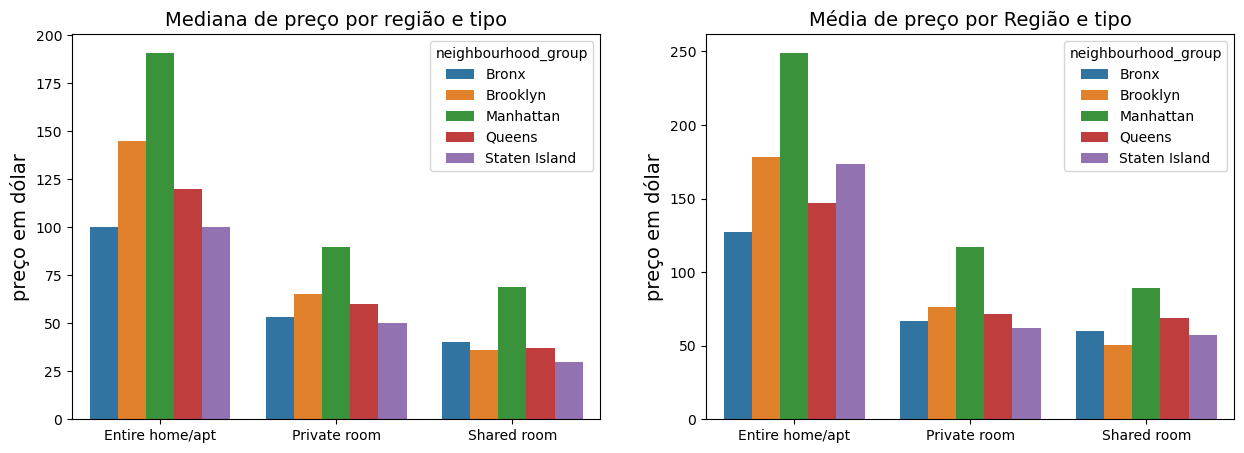

In [2]:
regiao_median_price = df.groupby(['neighbourhood_group', 'room_type'])['price'].median().reset_index()
regiao_mean_price = df.groupby(['neighbourhood_group', 'room_type'])['price'].mean().reset_index()
fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.barplot(x='room_type', y='price',hue = 'neighbourhood_group' ,data=regiao_median_price, ax=axes[0])
sns.barplot(x='room_type', y='price',hue = 'neighbourhood_group', data=regiao_mean_price, ax=axes[1])
axes[0].set_title('Mediana de preço por região e tipo', fontsize=14)
axes[1].set_title('Média de preço por Região e tipo', fontsize=14)
axes[0].set_xlabel('', fontsize=14)
axes[1].set_xlabel('', fontsize=14)
axes[0].set_ylabel('preço em dólar', fontsize=14)
axes[1].set_ylabel('preço em dólar', fontsize=14)

### Número alto de reviews tem influência no maior número de aluguéis por ano? se sim, qual locais com maior número de reviews?

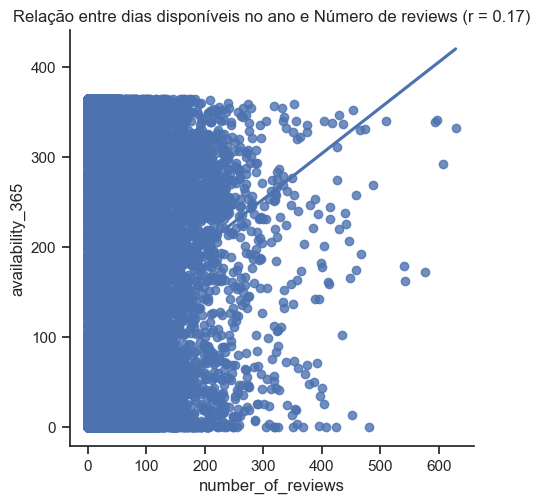

In [81]:
# Calculando a correlação de Pearson
correlacao_pearson = df['number_of_reviews'].corr(df['availability_365'])
sns.lmplot(x='number_of_reviews', y='availability_365', data=df, ci=None)
plt.title(f'Relação entre dias disponíveis no ano e Número de reviews (r = {correlacao_pearson:.2f})')
plt.show()

### Vizualização do posicionamento dos airbnb's nas regiões de NY e Vizualização do comportamento dos tipos de airbnb's no mapa de NY

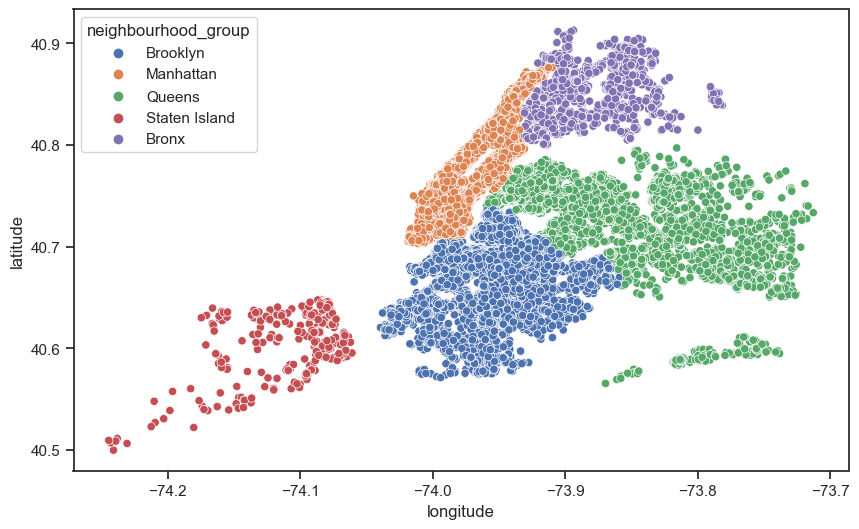

In [82]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue=df['neighbourhood_group'])
plt.show()

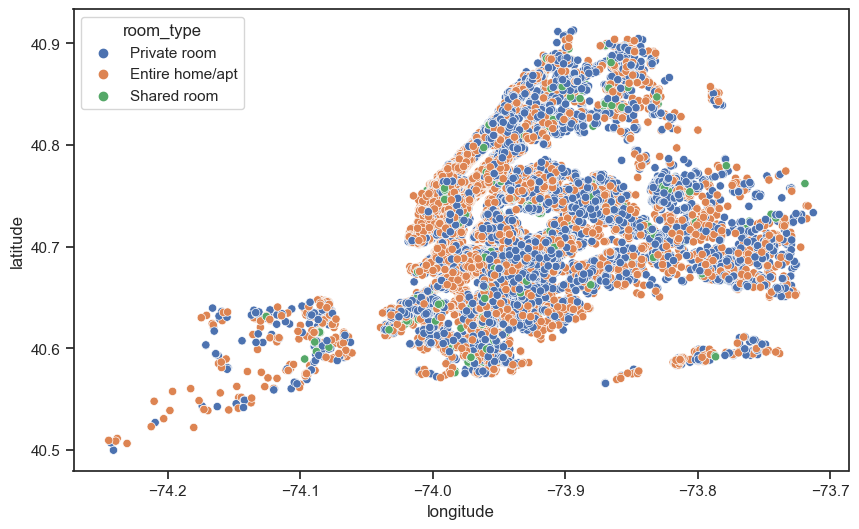

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue=df['room_type'])
plt.show();

#### Quais macro regiões menos ocupadas anualmente? 

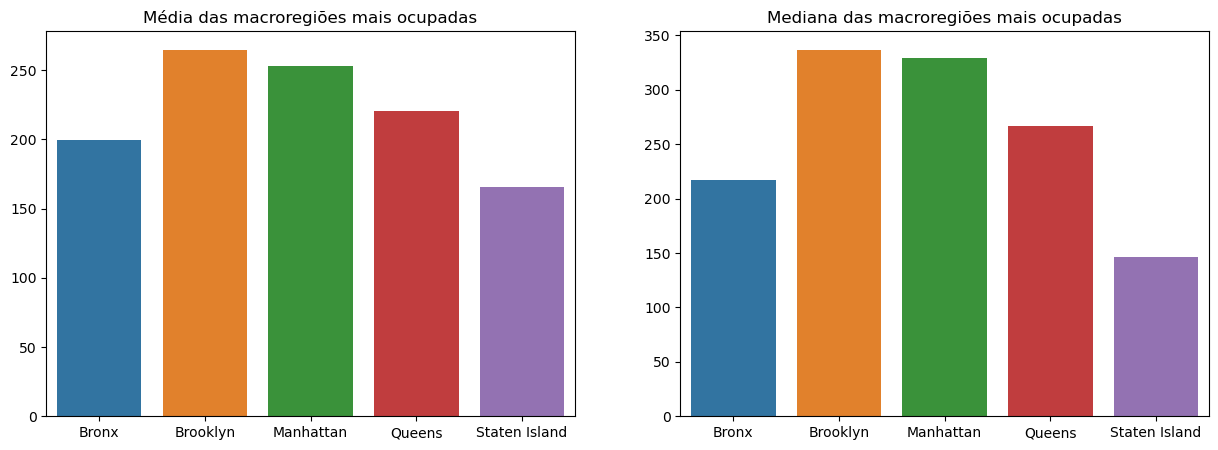

In [15]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
macro_regiao_mean = df.groupby('neighbourhood_group')['availability_365'].mean().reset_index(name='count')
macro_regiao_mean['count'] = 365 - macro_regiao_mean['count']  
macro_regiao_median = df.groupby('neighbourhood_group')['availability_365'].median().reset_index(name='count')
macro_regiao_median['count'] = 365 - macro_regiao_median['count'] 
sns.barplot(x='neighbourhood_group', y='count', data=macro_regiao_mean, ax=axes[0])
sns.barplot(x='neighbourhood_group', y='count', data=macro_regiao_median, ax=axes[1])
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[0].set_title('Média das macroregiões mais ocupadas')
axes[1].set_title('Mediana das macroregiões mais ocupadas')
plt.show()

#### Quais palavras mais repetidas nos títulos?¶

In [8]:
import re
from collections import Counter
from nltk.corpus import stopwords
import nltk

# Baixar o pacote de stopwords
nltk.download('stopwords')

# Função para limpar e processar o texto
def processar_texto(texto):
    if pd.isna(texto):  # Verificar se o texto é NaN ou None
        return []
    stop_words = set(stopwords.words('portuguese'))
    palavras = re.findall(r'\b\w+\b', texto.lower())
    return [palavra for palavra in palavras if palavra not in stop_words]

# Limpar a coluna 'last_review' e contar as palavras
todas_palavras = sum(df['name'].dropna().apply(processar_texto), [])
contagem = Counter(todas_palavras).most_common(50)

# Mostrar as palavras mais comuns
for palavra, frequencia in contagem:
    print(f'{palavra}: {frequencia}')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\messi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


in: 16795
room: 10281
bedroom: 8205
private: 7409
apartment: 6760
cozy: 5097
apt: 4740
1: 4230
brooklyn: 4175
studio: 4106
the: 3920
to: 3836
2: 3834
spacious: 3796
manhattan: 3592
park: 3161
with: 3111
east: 3107
of: 3009
sunny: 2945
and: 2872
williamsburg: 2742
beautiful: 2514
near: 2373
village: 2346
nyc: 2285
w: 2178
loft: 2098
large: 2084
heart: 2071
bed: 2068
home: 1885
modern: 1821
central: 1818
bright: 1725
luxury: 1711
from: 1703
location: 1620
west: 1598
new: 1583
1br: 1576
bushwick: 1438
side: 1433
charming: 1387
upper: 1356
one: 1338
br: 1291
midtown: 1283
3: 1280
quiet: 1251


### Qual a média do número mínimo de noites por macroregião?

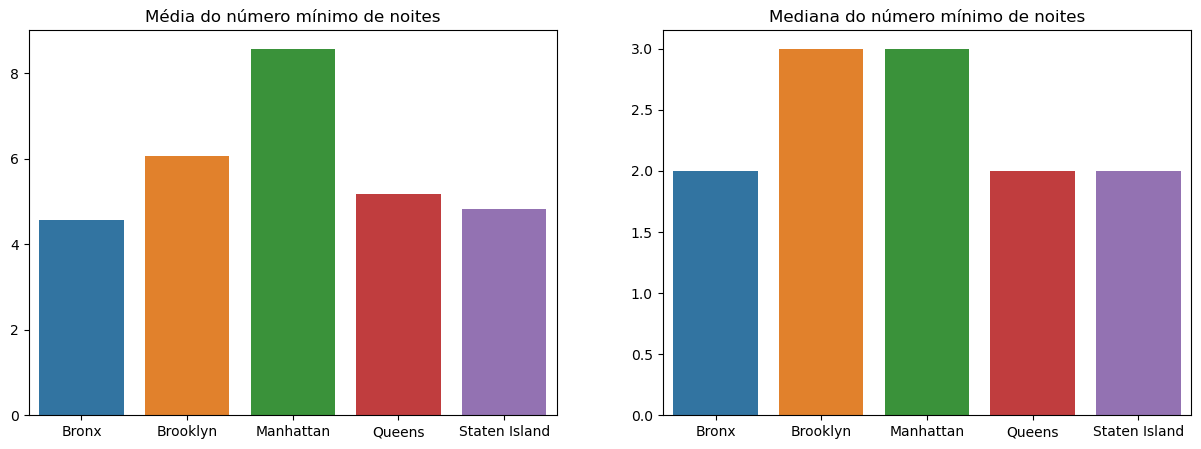

In [16]:

fig, axes = plt.subplots(1,2, figsize=(15,5))
macro_regiao_mean = df.groupby('neighbourhood_group')['minimum_nights'].mean().reset_index(name='count')
macro_regiao_median = df.groupby('neighbourhood_group')['minimum_nights'].median().reset_index(name='count')
sns.barplot(x='neighbourhood_group', y='count', data=macro_regiao_mean, ax=axes[0])
sns.barplot(x='neighbourhood_group', y='count', data=macro_regiao_median, ax=axes[1])
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[0].set_title('Média do número mínimo de noites')
axes[1].set_title('Mediana do número mínimo de noites')
plt.show()

### Qual a média do número mínimo de noites por macroregião e tipo?

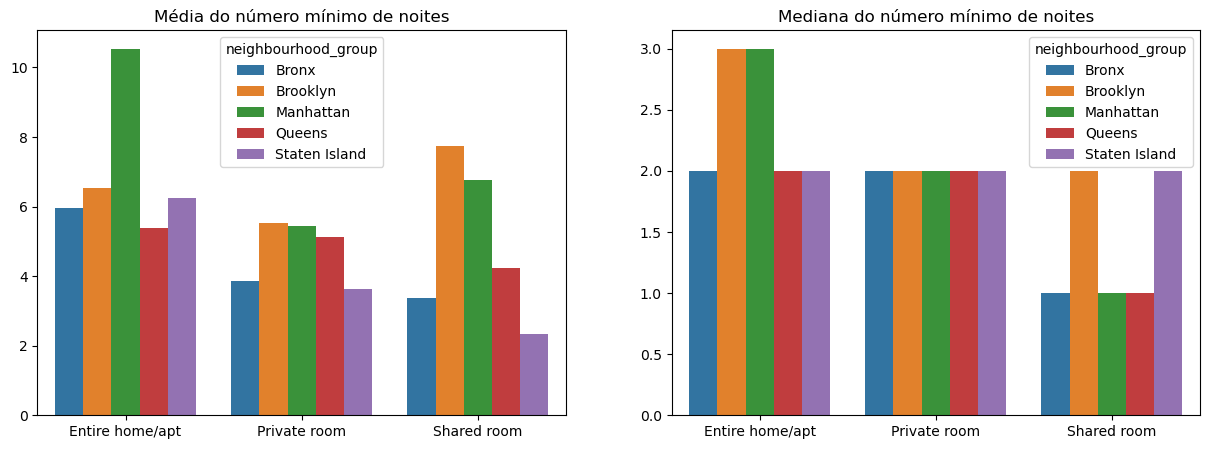

In [20]:
##minimum_nights	
fig, axes = plt.subplots(1,2, figsize=(15,5))
macro_regiao_mean = df.groupby(['neighbourhood_group','room_type'])['minimum_nights'].mean().reset_index(name='count')
macro_regiao_median = df.groupby(['neighbourhood_group','room_type'])['minimum_nights'].median().reset_index(name='count')
sns.barplot(x='room_type', y='count', data=macro_regiao_mean, hue='neighbourhood_group', ax=axes[0])
sns.barplot(x='room_type', y='count', data=macro_regiao_median,hue='neighbourhood_group', ax=axes[1])
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[0].set_title('Média do número mínimo de noites')
axes[1].set_title('Mediana do número mínimo de noites')
plt.show()

#### O número mínimo de noites tem relação com o preço do aluguel?

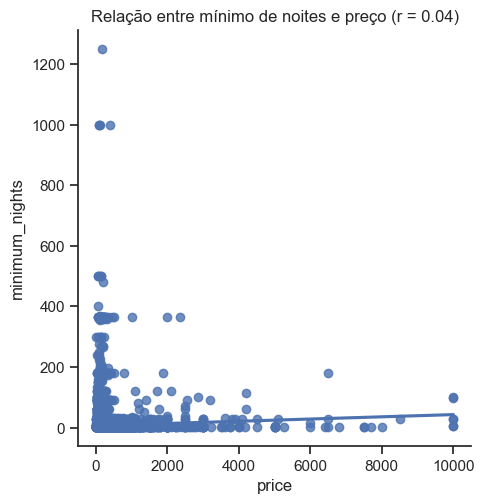

In [84]:
correlacao_pearson = df['price'].corr(df['minimum_nights'])
sns.lmplot(x='price', y='minimum_nights', data=df, ci=None)
plt.title(f'Relação entre mínimo de noites e preço (r = {correlacao_pearson:.2f})')
plt.show()

#### Quais os tipos de airbnb's mais alugados por região?

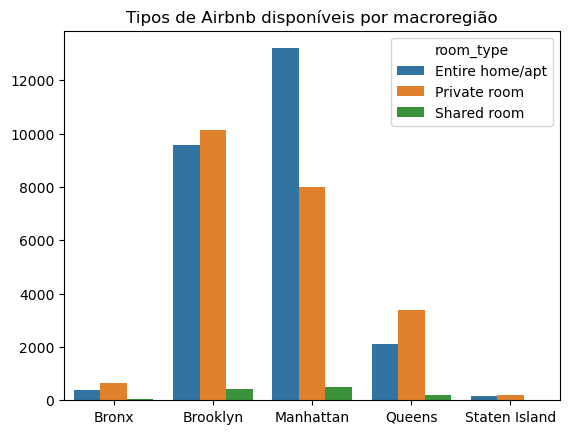

In [21]:
neigh_unique_values = df['neighbourhood_group'].unique()
room_type_unique_values = df['room_type'].unique()
room_type_count_by_neighbourhood_group = df.groupby(['neighbourhood_group','room_type']).size().reset_index(name='count')
sns.barplot(x='neighbourhood_group', y='count', hue='room_type', data=room_type_count_by_neighbourhood_group);
plt.xlabel('')
plt.ylabel('')
plt.title('Tipos de Airbnb disponíveis por macroregião');

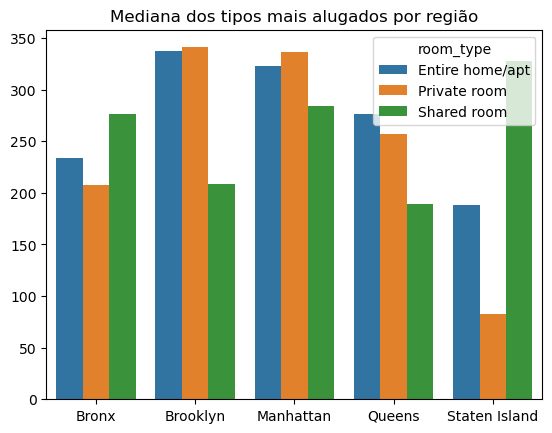

In [36]:
#Usamos a média e não soma total de dias livres pois se somar apenas vai ter como influência direta o maior número de airbnb's por regiao.
#365 - valor -> pois 365 - número de dias livres = Número de dias alugados.
df_more_rented = df.groupby(['neighbourhood_group','room_type'])['availability_365'].median().reset_index(name='count')
df_more_rented['count'] = 365 - df_more_rented['count']
sns.barplot(x='neighbourhood_group', y='count', hue='room_type', data=df_more_rented)
plt.xlabel('')
plt.ylabel('')
plt.title('Mediana dos tipos mais alugados por região');

## Análise Diagnóstica

#### Quais as regiões com mais airbnb 's cadastrados?
Manhattan e Brooklyn se destacam pelo grande número de Airbnb's cadastrados, seguido do Queens, Bronx e Staten Island possuem números muito inferiores as outras regiões. 
#### Qual a média de preço da macrorregião e microrregião? e por tipo?
Comparando os gráficos de média e mediana de preço por região, percebe-se que há uma grande diferença nos valores de ambos, o que indica a presença de muitos outliers. Percebe-se uma grande diferença de preço dos alugueis de Manhattan comparado as outras macrorregiões. Além disso, a proximidade de valor mediano do Brooklyn, Queen e Staten Island apesar do Brooklyn ter muito mais airbnb's cadastrados.
#### Qual a Média / Mediana por tipo em cada macroregião
Com a análise de tipos de airbnb's inclusa, observa-se que Manhattan se mantêm com a maior média e mediana de preço em todos os tipos de airbnbs. O Brooklyn quebra o padrão de ter a média mais cara em quarto compartilhados e se equipara a Queen e Staten Island e Bronx.
#### Número alto de reviews tem influência no maior número de aluguéis por ano? se sim, qual locais com maior número de reviews?
Correlação fraca. é provável que as avaliações positivas influenciam em um número maior de aluguéis e negativas um número menor. Porém, um número alto de avaliações não tem realação direta com um alto número de dias alugados.
#### Quais macro regiões mais ocupadas anualmente? e micro?
Quanto a ocupação das regiões, percebe-se que o Brooklyn e Manhattan tem um número mediano muito próximo, seguido do Queens, Bronx e Staten Island. Dessa forma, segue o padrão de número de airnbns cadastrados. Apesar disso, a mediana de preço do Queens, Bronx e Staten Island é muito próxima.
#### Quais palavras mais repetidas nos títulos?
private: 7409
cozy: 5097
studio: 4106
spacious: 3796
park: 3161
sunny: 2945
williamsburg: 2742
beautiful: 2514
near: 2373
village: 2346
loft: 2098
large: 2084
heart: 2071
bed: 2068
home: 1885
modern: 1821
central: 1818
bright: 1725
luxury: 1711
new: 1583
1br: 1576
bushwick: 1438
charming: 1387
midtown: 1283
quiet: 1251
#### Qual a média do número mínimo de noites? Macro e Micro regiões
Manhattan destoa dos demais em média por possuir mais outliers significativos em  valor. A mediana de Queens, Bronx e Staten Island segue o mesmo padrão da média. E o Brooklyn tem a mesma mediana que Manhattan.
#### Qual a média do número mínimo de noites por preço e tipo?
No geral, a mediana está entre 1 e 2, para quartos privados temos a mesma mediana e quartos compartilhados há uma diferença de uma unidade em Brooklyn e Staten Island. Além disso, para casas ou apartamentos inteiros temos a mediana em 2 dias, exceto Brooklyn e Manhattan que são de 3 dias.
A média destaca a diferença de dias de Manhattan para as outra regiões em apartamentos inteiros e casas. Quartos privados mantém uma média parecida para todos as regiões e quartos compartilhados o Brooklyn possue uma média maior que as regiões e que seus tipos anteriores.
#### O número mínimo de noites tem relação com o preço do aluguel?
Não
#### Quais os tipos de airbnb's mais alugados no geral e por região?
Bronx: Quarto compartilhados são os mais alugados, seguidos de apartamento inteiros e quartos privados.
Brooklyn: Quartos privados e apartamentos inteiros tem o números parecidos de locação, já quartos compartilhados é inferior.
Manhattan: Todos os tipos estão com preenchimento acima de 250 dias do ano.
Queen: Maior procura de apartamentos inteiros, seguidos de quartos privados e quartos compartilhados bem abaixo.
Staten Island: Quartos privados com mediana de locação extremamente baixa, quartos inteiros por volta de 200 dias ao ano e quartos commpartilhados com alta locação,
Devemos levar em consideração o número extreamamente inferior de quartos compaartilhados em todos os estados o que influencia diretamente no cálculo da mediana.